In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Load CIFAR-10 data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [29]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [5]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


In [30]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

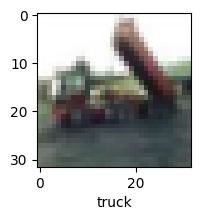

In [7]:
plot_sample(X_train, Y_train, 2)

/tmp/ipykernel_34/1805493356.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (15,2))


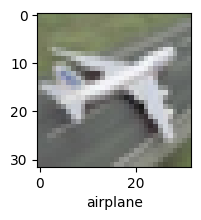

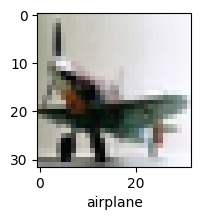

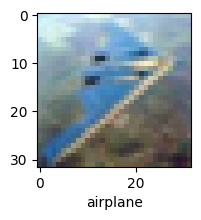

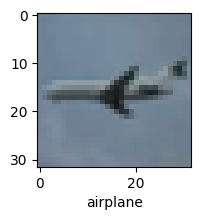

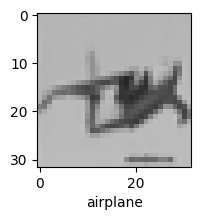

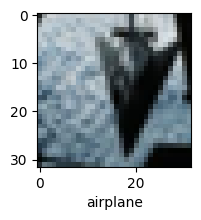

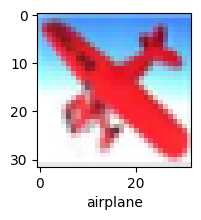

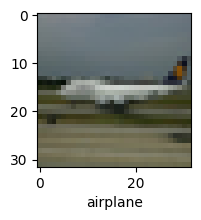

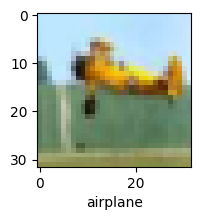

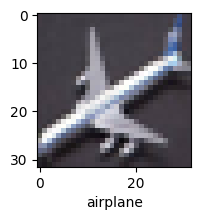

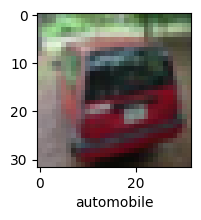

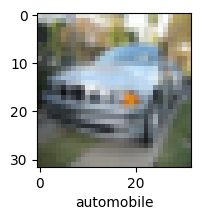

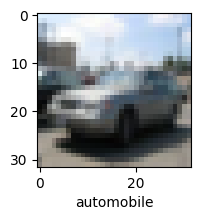

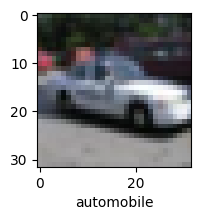

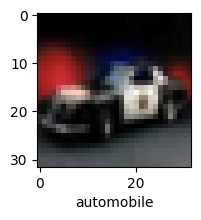

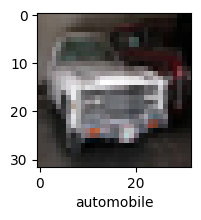

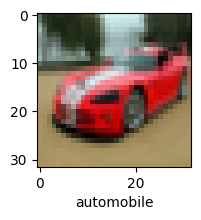

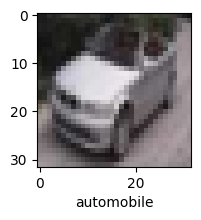

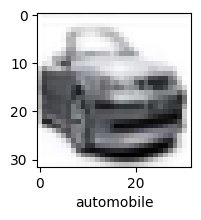

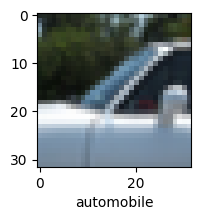

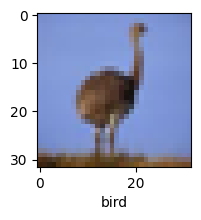

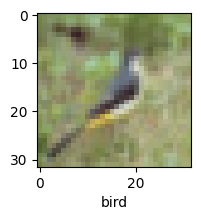

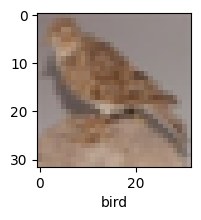

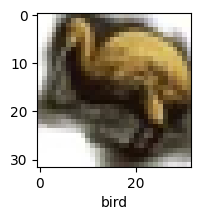

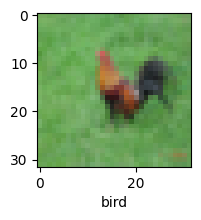

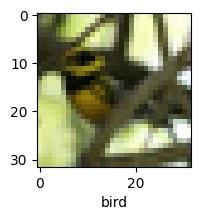

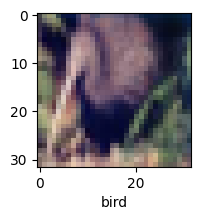

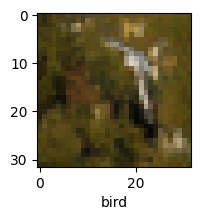

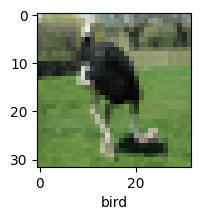

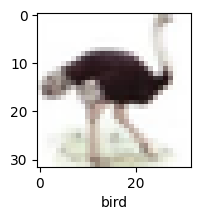

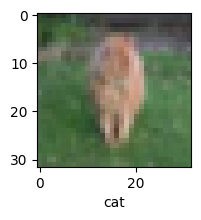

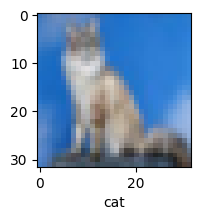

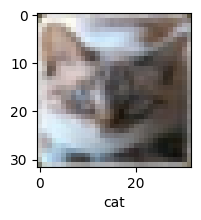

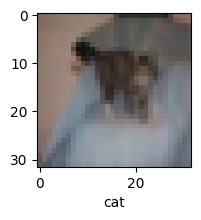

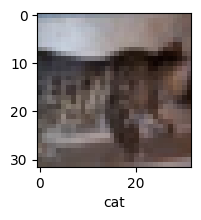

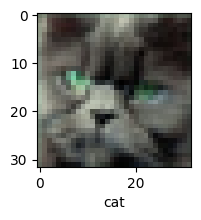

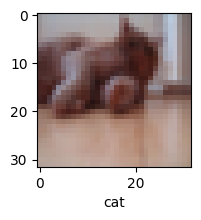

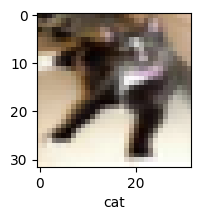

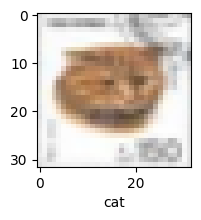

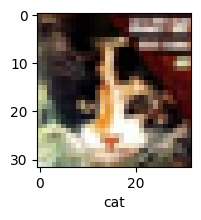

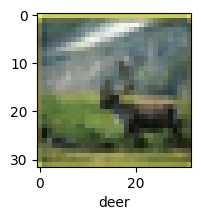

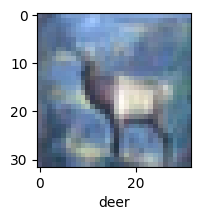

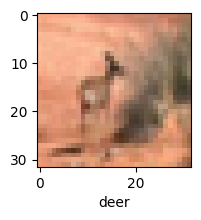

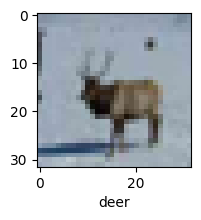

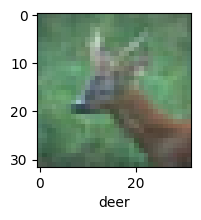

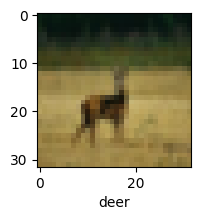

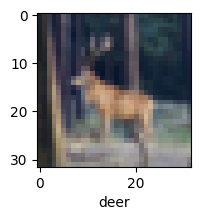

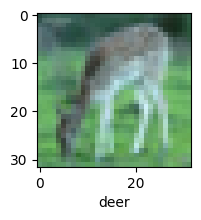

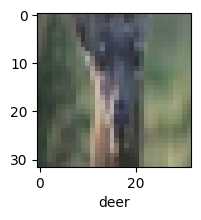

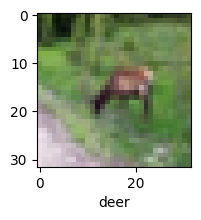

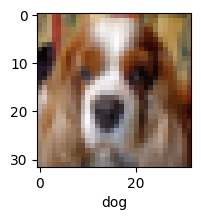

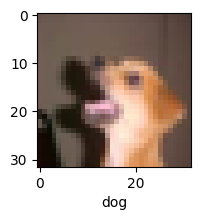

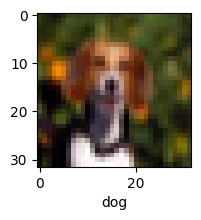

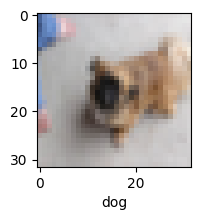

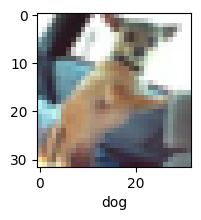

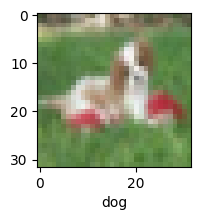

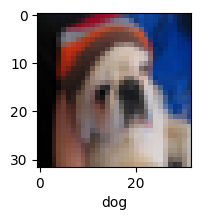

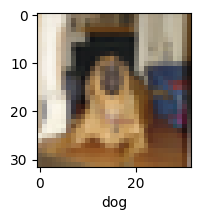

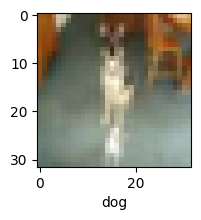

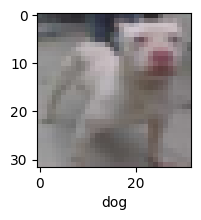

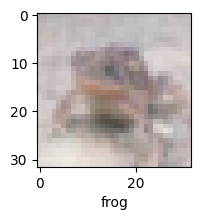

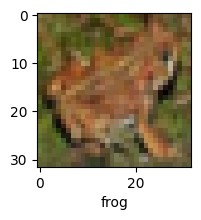

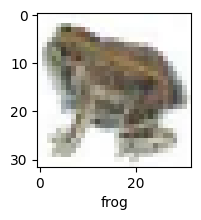

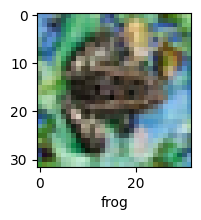

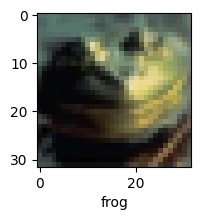

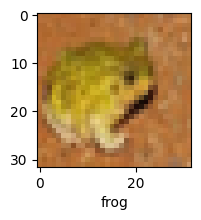

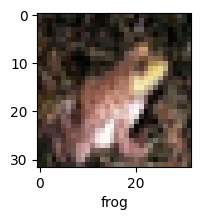

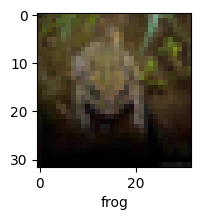

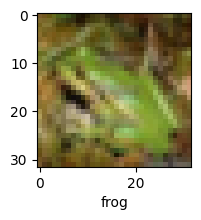

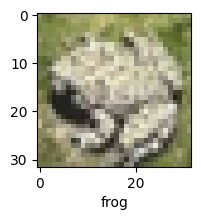

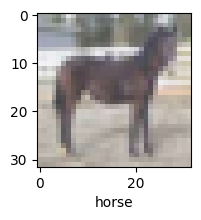

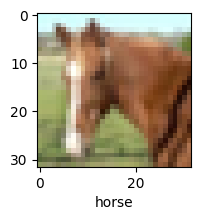

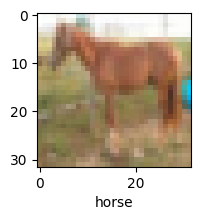

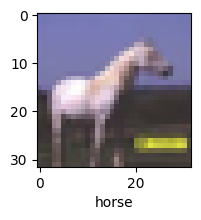

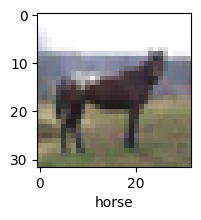

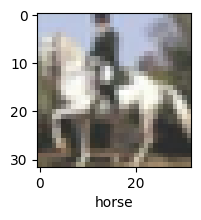

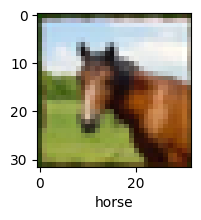

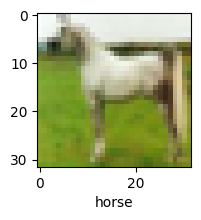

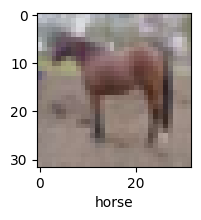

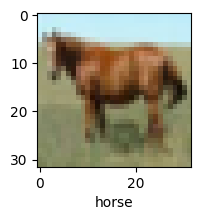

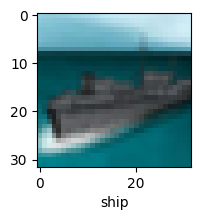

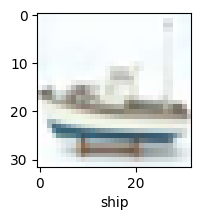

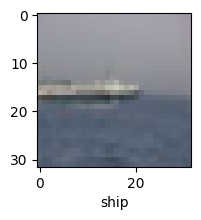

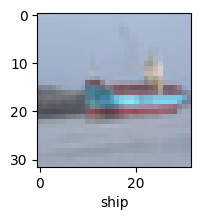

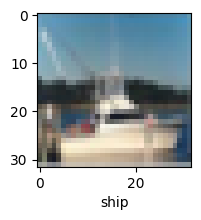

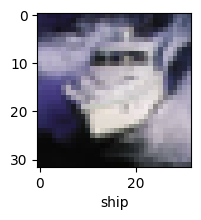

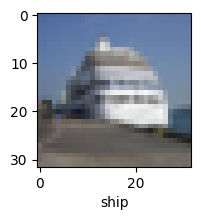

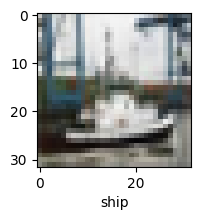

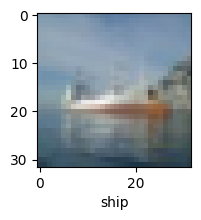

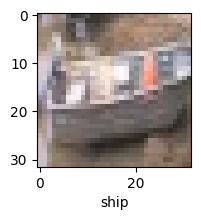

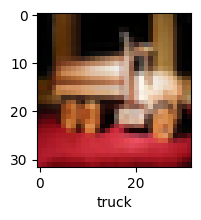

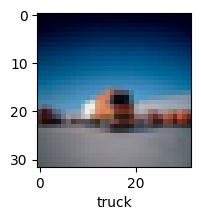

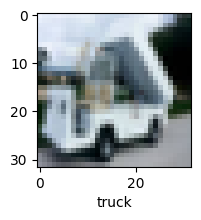

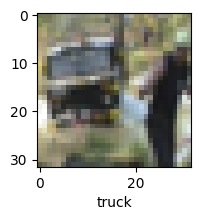

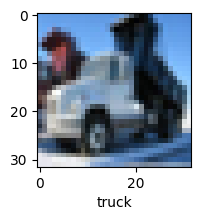

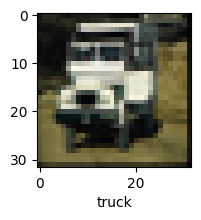

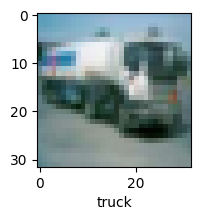

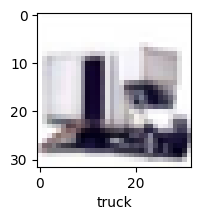

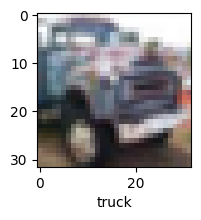

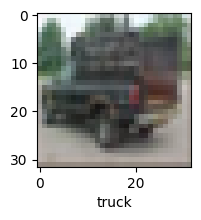

In [8]:
# Loop through each class
for cls_index, cls in enumerate(classes):
    # Find indices of images belonging to the current class
    indices_of_cls = np.where(Y_train == cls_index)[0]
    # Select 10 random indices without replacement
    random_indices = np.random.choice(indices_of_cls, 10, replace=False)

    # Display 10 images of the current class
    for index in random_indices:
        plot_sample(X_train, Y_train, index)

In [9]:
Y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [31]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [32]:
# Convert class vectors to binary class matrices
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

In [47]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(X_train)

In [4]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Callbacks
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [1]:
# Train the model

history = model.fit(X_train, Y_train, batch_size=64,
                    epochs=50, # Increased number of epochs
                    validation_data=(X_test, Y_test),
                    callbacks=[lr_reduction, early_stopping])

NameError: name 'model' is not defined

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8454 - loss: 0.4871
Test Loss: 0.4941953122615814
Test Accuracy: 0.8428000211715698


hyperparameter tuning

In [18]:
predictions = model.predict(X_test)
# Depending on your problem, you might need to transform these predictions into a more usable format.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [19]:
y_pred = np.argmax(predictions, axis=1)

In [20]:
print("Y_test shape:", Y_test.shape, "Sample:", Y_test[:5])
print("y_pred shape:", y_pred.shape, "Sample:", y_pred[:5])

Y_test shape: (10000, 10) Sample: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
y_pred shape: (10000,) Sample: [3 8 8 0 6]


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(Y_test, axis=1) # Assuming Y_test is one-hot encoded

print("\nMatrix\n")
print(confusion_matrix(y_true, y_pred))
print("\nReport\n")
print(classification_report(y_true, y_pred))



Matrix

[[845  17  22   2  10   0  10   7  45  42]
 [  0 954   1   1   0   1   3   0   5  35]
 [ 47   3 719  14  43  32 110  14   7  11]
 [ 11   7  30 620  47 103 121  27  14  20]
 [  9   1  22  10 830   6  94  25   2   1]
 [  2   3  27  84  44 739  55  39   0   7]
 [  3   0   3   6   7   4 974   1   2   0]
 [ 10   2  12   9  38   9  27 878   1  14]
 [ 23  13   0   2   0   1   8   1 929  23]
 [  5  40   1   1   2   0   3   1   7 940]]

Report

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1000
           1       0.92      0.95      0.94      1000
           2       0.86      0.72      0.78      1000
           3       0.83      0.62      0.71      1000
           4       0.81      0.83      0.82      1000
           5       0.83      0.74      0.78      1000
           6       0.69      0.97      0.81      1000
           7       0.88      0.88      0.88      1000
           8       0.92      0.93      0.92      1000
          

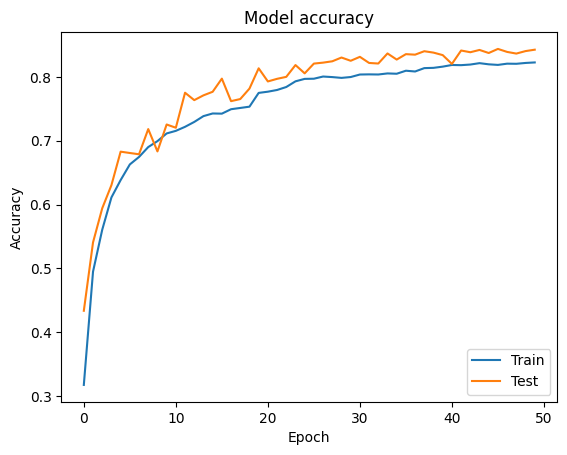

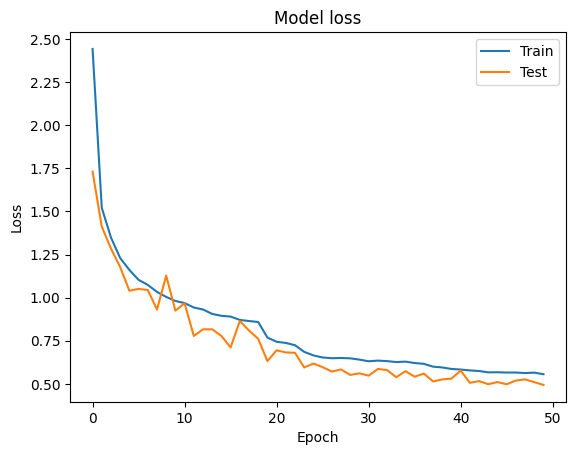

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [33]:
!pip install keras-tuner



In [48]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras_tuner import RandomSearch

In [49]:


def build_model(hp):
 
    model = Sequential([
        Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
               kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
               activation='relu',
               input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
               kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
               activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)),

        Flatten(),
        Dense(units=hp.Int('dense_1_units', min_value=64, max_value=128, step=16),
              activation='relu'),
        Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [50]:

tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=20,  # Set a small number of trials for demo purposes
                      # Executes each model 3 times
                     directory='model_tuning',
                     project_name='cifar10')

Reloading Tuner from model_tuning/cifar10/tuner0.json


In [51]:
# Perform hyperparameter tuning
tuner.search(datagen.flow(X_train, Y_train, batch_size=128),
             epochs=10,  # Use a smaller number of epochs for demo purposes
             validation_data=(X_test, Y_test))

In [52]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the first dense layer is {best_hps.get('dense_1_units')} and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first dense layer is 112 and the optimal learning rate for the optimizer is 0.00016378962306363488.



In [53]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(datagen.flow(X_train, Y_train, batch_size=64),
                    epochs=50,
                    validation_data=(X_test, Y_test))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  5/782 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.1346 - loss: 2.6020

W0000 00:00:1710432135.960913     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


561/782 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.3122 - loss: 1.8894

W0000 00:00:1710432163.187264     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3306 - loss: 1.8383

W0000 00:00:1710432172.960453     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.3307 - loss: 1.8381 - val_accuracy: 0.4866 - val_loss: 1.4238
Epoch 2/50


W0000 00:00:1710432173.852291     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.4765 - loss: 1.4593 - val_accuracy: 0.5776 - val_loss: 1.1764
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5382 - loss: 1.2897 - val_accuracy: 0.6251 - val_loss: 1.0831
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5748 - loss: 1.2067 - val_accuracy: 0.6529 - val_loss: 0.9909
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.5997 - loss: 1.1407 - val_accuracy: 0.6541 - val_loss: 0.9940
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.6181 - loss: 1.0922 - val_accuracy: 0.6966 - val_loss: 0.8647
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6292 - loss: 1.0533 - val_accuracy: 0.6760 - val_loss: 0.9249
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6390 - loss: 1.0272 - val_accuracy: 0.6714 - val_loss: 0.9498
Epoch 9/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.6473 - loss: 1.0053 - val_accurac

In [54]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7708 - loss: 0.6777
Test Loss: 0.6799864172935486
Test Accuracy: 0.7681999802589417


In [55]:
predictions = model.predict(X_test)

107/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

W0000 00:00:1710433769.475879     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


W0000 00:00:1710433770.149246     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [56]:
y_pred = np.argmax(predictions, axis=1)

In [57]:
print("Y_test shape:", Y_test.shape, "Sample:", Y_test[:5])
print("y_pred shape:", y_pred.shape, "Sample:", y_pred[:5])

Y_test shape: (10000, 10) Sample: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
y_pred shape: (10000,) Sample: [3 8 1 0 6]


In [58]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(Y_test, axis=1) # Assuming Y_test is one-hot encoded

print("\nMatrix\n")
print(confusion_matrix(y_true, y_pred))
print("\nReport\n")
print(classification_report(y_true, y_pred))


Matrix

[[799  32  23   5  13   2  23   8  32  63]
 [  4 915   2   3   0   1   8   1   4  62]
 [ 53   5 648  24  48  33 131  33   5  20]
 [ 18  15  48 535  44  99 154  35  14  38]
 [ 15   3  47  29 674  12 153  59   5   3]
 [ 10   9  54 146  31 611  72  51   1  15]
 [  3   4  21  15   4   2 941   6   1   3]
 [ 10   4  19  23  36  30  19 834   0  25]
 [ 48  61   8   7   0   2   9   0 808  57]
 [  6  54   2   1   1   0   8   2   9 917]]

Report

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1000
           1       0.83      0.92      0.87      1000
           2       0.74      0.65      0.69      1000
           3       0.68      0.54      0.60      1000
           4       0.79      0.67      0.73      1000
           5       0.77      0.61      0.68      1000
           6       0.62      0.94      0.75      1000
           7       0.81      0.83      0.82      1000
           8       0.92      0.81      0.86      1000
          

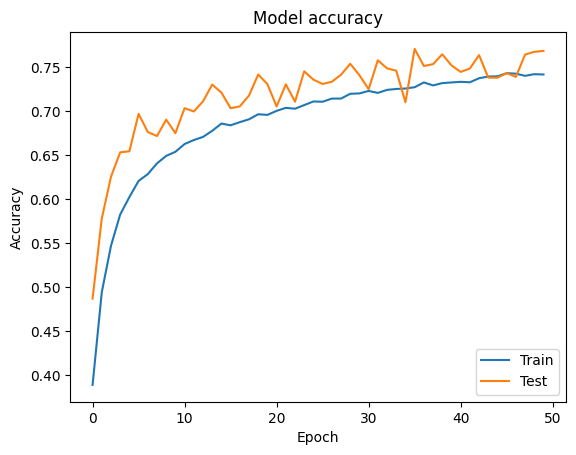

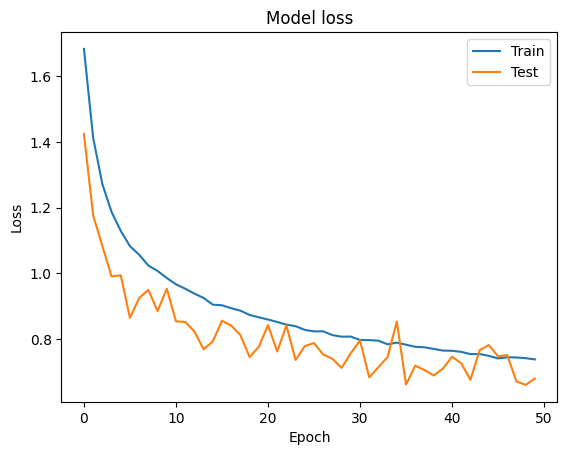

In [59]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()